In [34]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
hbnum_np_np = np.loadtxt("hbnum_np-np.xvg", comments=["@", "#"],unpack=True)

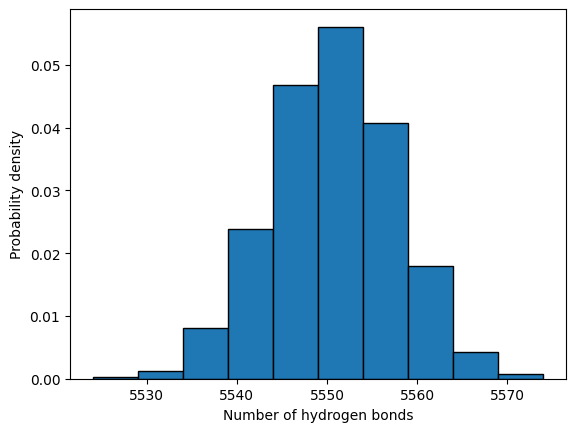

In [39]:
hbnum_np_np = np.loadtxt("hbnum_np-np.xvg", comments=["@", "#"],unpack=True)
ti = int(2/3*len(hbnum_np_np[0]))
hbnum = hbnum_np_np[1][ti:]
y,x,_ = plt.hist(hbnum,ec='black',density=True)
plt.xlabel('Number of hydrogen bonds')
plt.ylabel('Probability density')
plt.savefig("hbond-np-np.pdf", format="pdf")
plt.show()

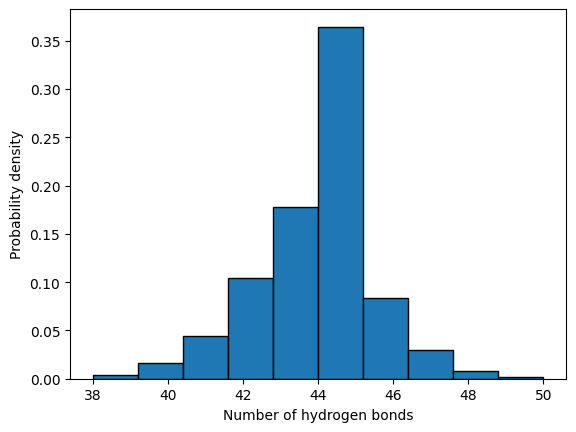

In [31]:
hbnum_p_np = np.loadtxt("hbnum_p-np.xvg", comments=["@", "#"],unpack=True)
ti = int(2/3*len(hbnum_p_np[0]))
hbnum1 = hbnum_p_np[1][ti:]
y,x,_ = plt.hist(hbnum1,ec='black',density=True)
plt.xlabel('Number of hydrogen bonds')
plt.ylabel('Probability density')
plt.savefig("hbond-p-np.pdf", format="pdf")
plt.show()

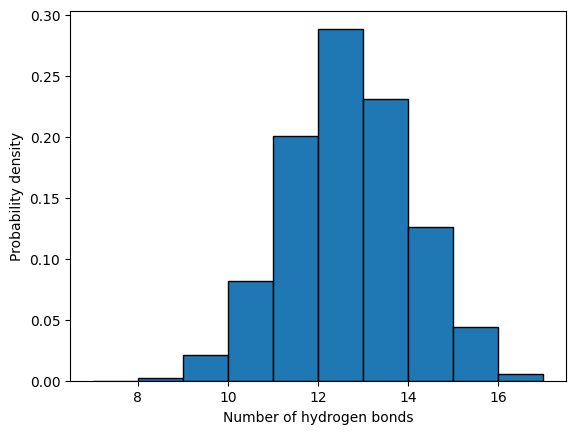

In [33]:
hbnum_p_p = np.loadtxt("hbnum_p-p.xvg", comments=["@", "#"],unpack=True)
ti = int(2/3*len(hbnum_p_p[0]))
hbnum2 = hbnum_p_p[1][ti:]
plt.hist(hbnum2,ec='black',density=True)
plt.xlabel('Number of hydrogen bonds')
plt.ylabel('Probability density')
plt.savefig("hbond-p-p.pdf", format="pdf")
plt.show()

In [26]:
import pandas as pd

In [27]:
hbnum_pd = pd.DataFrame(hbnum)
hbnum_pd.describe()

,0
count,5753.000000
mean,5550.157309
std,6.911630
min,5524.000000
25%,5546.000000
50%,5550.000000
75%,5555.000000
max,5574.000000


In [28]:
hbnum1_pd = pd.DataFrame(hbnum1)
hbnum1_pd.describe()

,0
count,5753.000000
mean,43.827047
std,1.648687
min,38.000000
25%,43.000000
50%,44.000000
75%,45.000000
max,50.000000


In [29]:
hbnum2_pd = pd.DataFrame(hbnum2)
hbnum2_pd.describe()


,0
count,5753.000000
mean,12.200243
std,1.390118
min,7.000000
25%,11.000000
50%,12.000000
75%,13.000000
max,17.000000


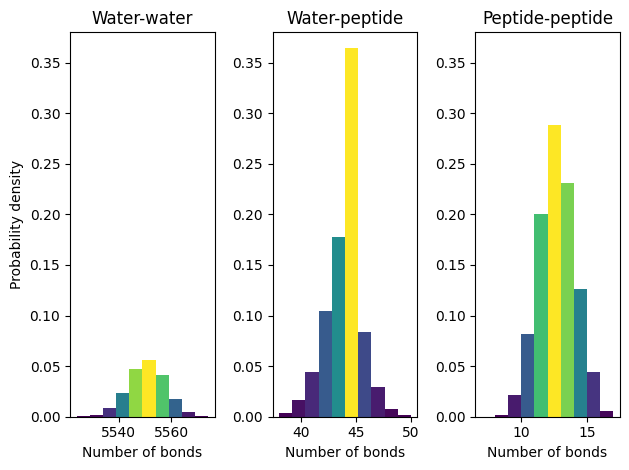

In [60]:
fig, axs = plt.subplots(1, 3, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(hbnum, density=True)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
N, bins, patches = axs[1].hist(hbnum1, density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
N, bins, patches = axs[2].hist(hbnum2, density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[0].set_ylim([0, 0.38])
axs[1].set_ylim([0, 0.38])
axs[2].set_ylim([0, 0.38])
axs[0].set_title("Water-water")
axs[1].set_title("Water-peptide")
axs[2].set_title("Peptide-peptide")
axs[0].set_xlabel('Number of bonds')
axs[1].set_xlabel('Number of bonds')
axs[2].set_xlabel('Number of bonds')
axs[0].set_ylabel('Probability density')
fig.savefig("hbond-histogram.pdf", format="pdf")